In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading vaccination data
vacc_raw_df=pd.read_excel('Vaccination_Data.xlsx')
vacc_raw_df

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Bhutan,BTN,SEARO,REPORTING,2022-10-30,2011426.0,699116.0,261.0,91.0,677669.0,88.0,NaN,2021-03-27,NaN,634641.0,82.0
1,Namibia,NAM,AFRO,REPORTING,2023-11-12,1005937.0,629767.0,40.0,25.0,550978.0,22.0,NaN,2021-03-19,NaN,298560.0,12.0
2,Iran (Islamic Republic of),IRN,EMRO,REPORTING,2023-11-26,155461757.0,65199831.0,185.0,78.0,58585264.0,70.0,NaN,2021-02-09,NaN,31352288.0,37.0
3,Kenya,KEN,AFRO,REPORTING,2023-04-02,23750431.0,14494372.0,44.0,27.0,11090440.0,21.0,NaN,2021-03-05,NaN,2000636.0,4.0
4,Greenland,GRL,EURO,REPORTING,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Guinea-Bissau,GNB,AFRO,REPORTING,2023-10-15,920752.0,747057.0,47.0,38.0,547637.0,28.0,NaN,2021-04-02,NaN,76359.0,4.0
206,Liechtenstein,LIE,NaN,REPORTING,NaT,71104.0,26681.0,NaN,NaN,26346.0,NaN,NaN,NaT,NaN,18310.0,NaN
207,Côte d'Ivoire,CIV,AFRO,REPORTING,2023-02-19,25263932.0,13568372.0,96.0,51.0,12164304.0,46.0,NaN,2021-03-01,NaN,3138712.0,12.0
208,Equatorial Guinea,GNQ,AFRO,REPORTING,2022-07-24,488738.0,270109.0,35.0,19.0,214032.0,15.0,NaN,2021-02-12,NaN,4597.0,NaN


In [3]:
# Loading COVID data
covid_raw_df=pd.read_excel('WHO_Covid-19_Global_Data.xlsx')
covid_raw_df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,"Sunday, January 5, 2020",TK,Tokelau,WPRO,NaN,0,NaN,0
1,"Sunday, January 12, 2020",TK,Tokelau,WPRO,NaN,0,NaN,0
2,"Sunday, January 19, 2020",TK,Tokelau,WPRO,NaN,0,NaN,0
3,"Sunday, January 26, 2020",TK,Tokelau,WPRO,NaN,0,NaN,0
4,"Sunday, February 2, 2020",TK,Tokelau,WPRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
50875,"Sunday, March 28, 2021",WF,Wallis and Futuna,WPRO,65.0,376,NaN,0
50876,"Sunday, April 4, 2021",WF,Wallis and Futuna,WPRO,49.0,425,NaN,0
50877,"Sunday, April 11, 2021",WF,Wallis and Futuna,WPRO,16.0,441,NaN,0
50878,"Sunday, April 18, 2021",WF,Wallis and Futuna,WPRO,6.0,447,NaN,0


# EDA & Visualization -:

# 1.For covid data

In [4]:
# Meta-info about Covid data
print(covid_raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50880 entries, 0 to 50879
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      50880 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49608 non-null  object 
 3   WHO_region         45792 non-null  object 
 4   New_cases          36622 non-null  float64
 5   Cumulative_cases   50880 non-null  int64  
 6   New_deaths         24216 non-null  float64
 7   Cumulative_deaths  50880 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB
None


##### As we see, the **Date_reported** column is of object datatype, so we need to convert it into datetime format.And we will extract new columns **Month** from it which conatins the month name.

In [5]:
covid_raw_df['Date_reported']=pd.to_datetime(covid_raw_df.Date_reported,format="%A, %B %d, %Y")
covid_raw_df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,TK,Tokelau,WPRO,NaN,0,NaN,0
1,2020-01-12,TK,Tokelau,WPRO,NaN,0,NaN,0
2,2020-01-19,TK,Tokelau,WPRO,NaN,0,NaN,0
3,2020-01-26,TK,Tokelau,WPRO,NaN,0,NaN,0
4,2020-02-02,TK,Tokelau,WPRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
50875,2021-03-28,WF,Wallis and Futuna,WPRO,65.0,376,NaN,0
50876,2021-04-04,WF,Wallis and Futuna,WPRO,49.0,425,NaN,0
50877,2021-04-11,WF,Wallis and Futuna,WPRO,16.0,441,NaN,0
50878,2021-04-18,WF,Wallis and Futuna,WPRO,6.0,447,NaN,0


In [6]:
covid_raw_df['Month']=covid_raw_df.Date_reported.dt.month_name()
covid_raw_df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Month
0,2020-01-05,TK,Tokelau,WPRO,NaN,0,NaN,0,January
1,2020-01-12,TK,Tokelau,WPRO,NaN,0,NaN,0,January
2,2020-01-19,TK,Tokelau,WPRO,NaN,0,NaN,0,January
3,2020-01-26,TK,Tokelau,WPRO,NaN,0,NaN,0,January
4,2020-02-02,TK,Tokelau,WPRO,NaN,0,NaN,0,February
...,...,...,...,...,...,...,...,...,...
50875,2021-03-28,WF,Wallis and Futuna,WPRO,65.0,376,NaN,0,March
50876,2021-04-04,WF,Wallis and Futuna,WPRO,49.0,425,NaN,0,April
50877,2021-04-11,WF,Wallis and Futuna,WPRO,16.0,441,NaN,0,April
50878,2021-04-18,WF,Wallis and Futuna,WPRO,6.0,447,NaN,0,April


In [7]:
# Summary/Overview
pd.options.display.float_format = '{:,.2f}'.format
covid_raw_df.describe(include='all')
#pd.reset_option('display.float_format')--.to reset the option

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Month
count,50880,49396,49608,45792,"36,622.00","50,880.00","24,216.00","50,880.00",50880
unique,NaN,233,234,6,NaN,NaN,NaN,NaN,12
top,NaN,TK,Tokelau,EURO,NaN,NaN,NaN,NaN,January
freq,NaN,212,212,11660,NaN,NaN,NaN,NaN,5280
mean,2022-01-12 12:00:00,NaN,NaN,NaN,"21,144.90","1,595,994.13",289.91,"18,731.22",NaN
min,2020-01-05 00:00:00,NaN,NaN,NaN,"-65,079.00",0.00,"-3,432.00",0.00,NaN
25%,2021-01-08 06:00:00,NaN,NaN,NaN,52.00,"2,750.00",4.00,21.00,NaN
50%,2022-01-12 12:00:00,NaN,NaN,NaN,470.00,"38,136.00",21.00,411.50,NaN
75%,2023-01-16 18:00:00,NaN,NaN,NaN,"4,477.75","467,050.00",110.00,"6,066.25",NaN
max,2024-01-21 00:00:00,NaN,NaN,NaN,"40,475,477.00","103,436,829.00","47,687.00","1,165,780.00",NaN


# Mapping the Global Impact: COVID-19 Cases and Deaths by Country

#### Now, Let's Find Out The Top 10 Countries 📊 With Most Commulative Cases

In [8]:
highest_cases=covid_raw_df.pivot_table(index='Country',values='Cumulative_cases',aggfunc='max').sort_values(by='Cumulative_cases',ascending=False).head(10)
highest_cases

,Cumulative_cases
Country,
United States of America,103436829
China,99326423
India,45023751
France,38997490
Germany,38437756
Brazil,37519960
Republic of Korea,34571873
Japan,33803572
Italy,26693706


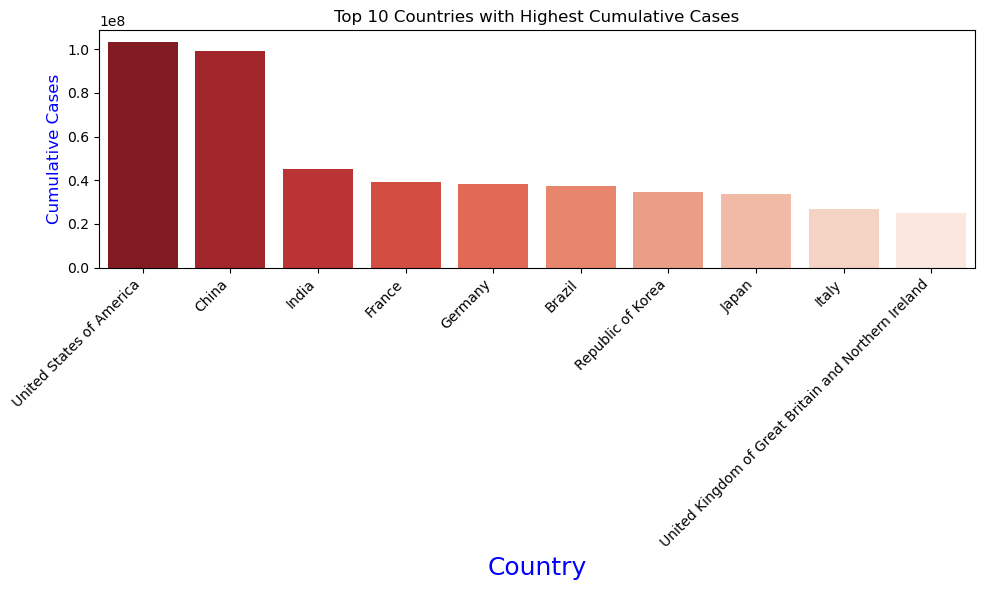

In [9]:
# Bar plot of top 10 coutries with highest cumulative cases
plt.figure(figsize=(10, 6))
sns.barplot(x=highest_cases.index, y='Cumulative_cases', data=highest_cases, palette='Reds_r')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country',c='b',size=18)
plt.ylabel('Cumulative Cases',c='b',size=12)
plt.title('Top 10 Countries with Highest Cumulative Cases')
plt.tight_layout()
plt.show()

#### Top 10 Countries 📊 With Highest Deaths Reported

In [10]:
highest_deaths=covid_raw_df.pivot_table(index='Country',values='Cumulative_deaths',aggfunc='max').sort_values(by='Cumulative_deaths',ascending=False).head(10)
highest_deaths

,Cumulative_deaths
Country,
United States of America,1165780
Brazil,702116
India,533434
Russian Federation,401773
Mexico,334958
United Kingdom of Great Britain and Northern Ireland,232112
Peru,221583
Italy,195805
Germany,174979


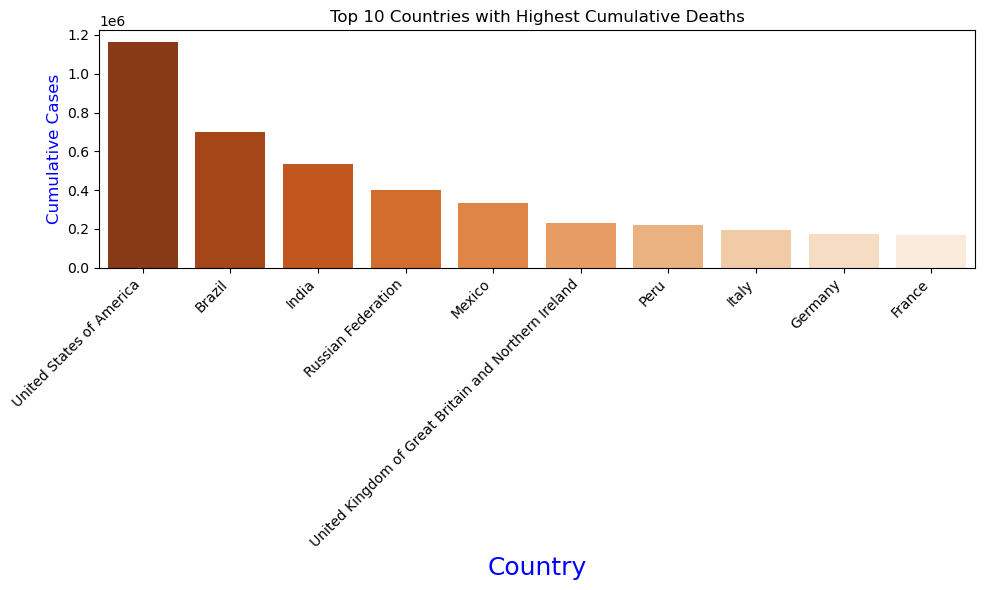

In [11]:
# Bar plot of top 10 coutries with highest cumulative deaths
plt.figure(figsize=(10, 6))
sns.barplot(x=highest_deaths.index, y='Cumulative_deaths', data=highest_deaths, palette='Oranges_r')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country',c='b',size=18)
plt.ylabel('Cumulative Cases',c='b',size=12)
plt.title('Top 10 Countries with Highest Cumulative Deaths')
plt.tight_layout()
plt.show()

#### Hmmm 🤔.... we can see that the some countries which are not in the top 10 commulative cases are present in the  deaths reported and vice-versa.Let's go 🚀 and find out the name of those countries.

In [12]:
countries_indeathsonly= highest_deaths.index.difference(highest_cases.index)
print(countries_indeathsonly.values)

['Mexico' 'Peru' 'Russian Federation']


In [13]:
countries_incasesonly= highest_cases.index.difference(highest_deaths.index)
print(countries_incasesonly.values)

['China' 'Japan' 'Republic of Korea']


# Regional Trends in the Global COVID-19 Pandemic: A WHO Perspective

##### We can delve deeper into the analysis to identify 🧐 which parts of the world are most affected. To achieve this, we can utilize the WHO_region column, as the World Health Organization has categorized the world into six regions: AFRO, AMRO, EMRO, EURO, SEARO, and WPRO.

In [14]:
# Sum of New Cases WHO-region wise
cases_region_wise=covid_raw_df.groupby(by=covid_raw_df.WHO_region)[['New_cases']].sum()
cases_region_wise

,New_cases
WHO_region,
AFRO,"9,033,235.00"
AMRO,"192,688,337.00"
EMRO,"23,411,056.00"
EURO,"278,547,697.00"
SEARO,"61,252,294.00"
WPRO,"208,125,046.00"


In [15]:
# Sum of New deaths WHO-region wise
deaths_region_wise=covid_raw_df.groupby(by=covid_raw_df.WHO_region)[['New_deaths']].sum()
deaths_region_wise

,New_deaths
WHO_region,
AFRO,"174,378.00"
AMRO,"2,994,548.00"
EMRO,"351,888.00"
EURO,"2,267,322.00"
SEARO,"808,379.00"
WPRO,"419,549.00"


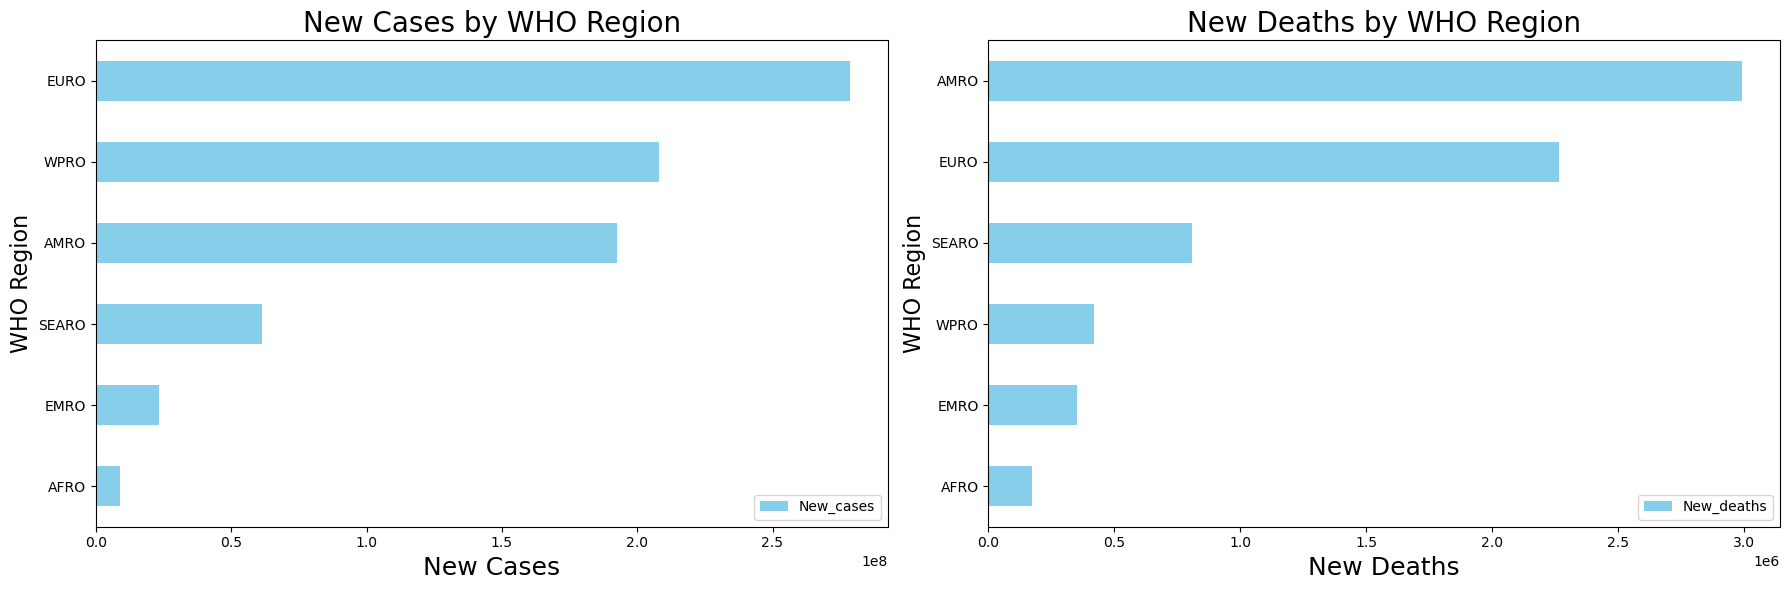

In [16]:
deaths_region_wise_sorted = deaths_region_wise.sort_values(by='New_deaths', ascending=True)
cases_region_wise_sorted = cases_region_wise.sort_values(by='New_cases', ascending=True)
# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot new cases by WHO region
cases_region_wise_sorted.plot(kind='barh', color='skyblue', ax=axs[0])
axs[0].set_xlabel('New Cases',fontsize=18)
axs[0].set_ylabel('WHO Region',fontsize=16)
axs[0].set_title('New Cases by WHO Region',fontsize=20)

# Plot new deaths by WHO region
deaths_region_wise_sorted.plot(kind='barh', color='skyblue', ax=axs[1])
axs[1].set_xlabel('New Deaths',fontsize=18)
axs[1].set_ylabel('WHO Region',fontsize=16)
axs[1].set_title('New Deaths by WHO Region',fontsize=20)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Unveiling the Impact of COVID-19: Cases and Deaths Across WHO Regions Over Time

#### Year wise new cases and deaths

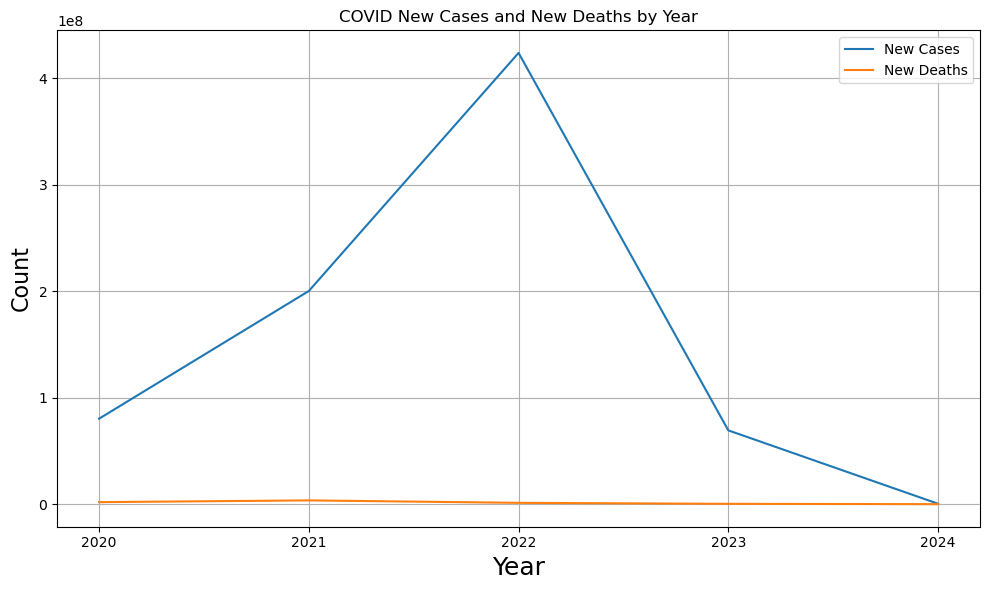

In [17]:
# Step 1: Extract year from 'Date_reported' column
covid_raw_df['Year'] = covid_raw_df['Date_reported'].dt.year

# Step 2: Group data by year and calculate sum of new cases and new deaths
grouped_data = covid_raw_df.groupby(['Year'])[['New_cases', 'New_deaths']].sum()

# Step 3: Create separate line charts for new cases and new deaths
plt.figure(figsize=(10, 6))

# Plot new cases
plt.plot(grouped_data.index, grouped_data['New_cases'], label='New Cases')

# Plot new deaths
plt.plot(grouped_data.index, grouped_data['New_deaths'], label='New Deaths')

# Customize the plot
plt.title('COVID New Cases and New Deaths by Year')
plt.xlabel('Year',size=18)
plt.ylabel('Count',size=16)
plt.xticks(grouped_data.index)  # Set x-axis ticks as years
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

#### Month wise new cases and deaths each year

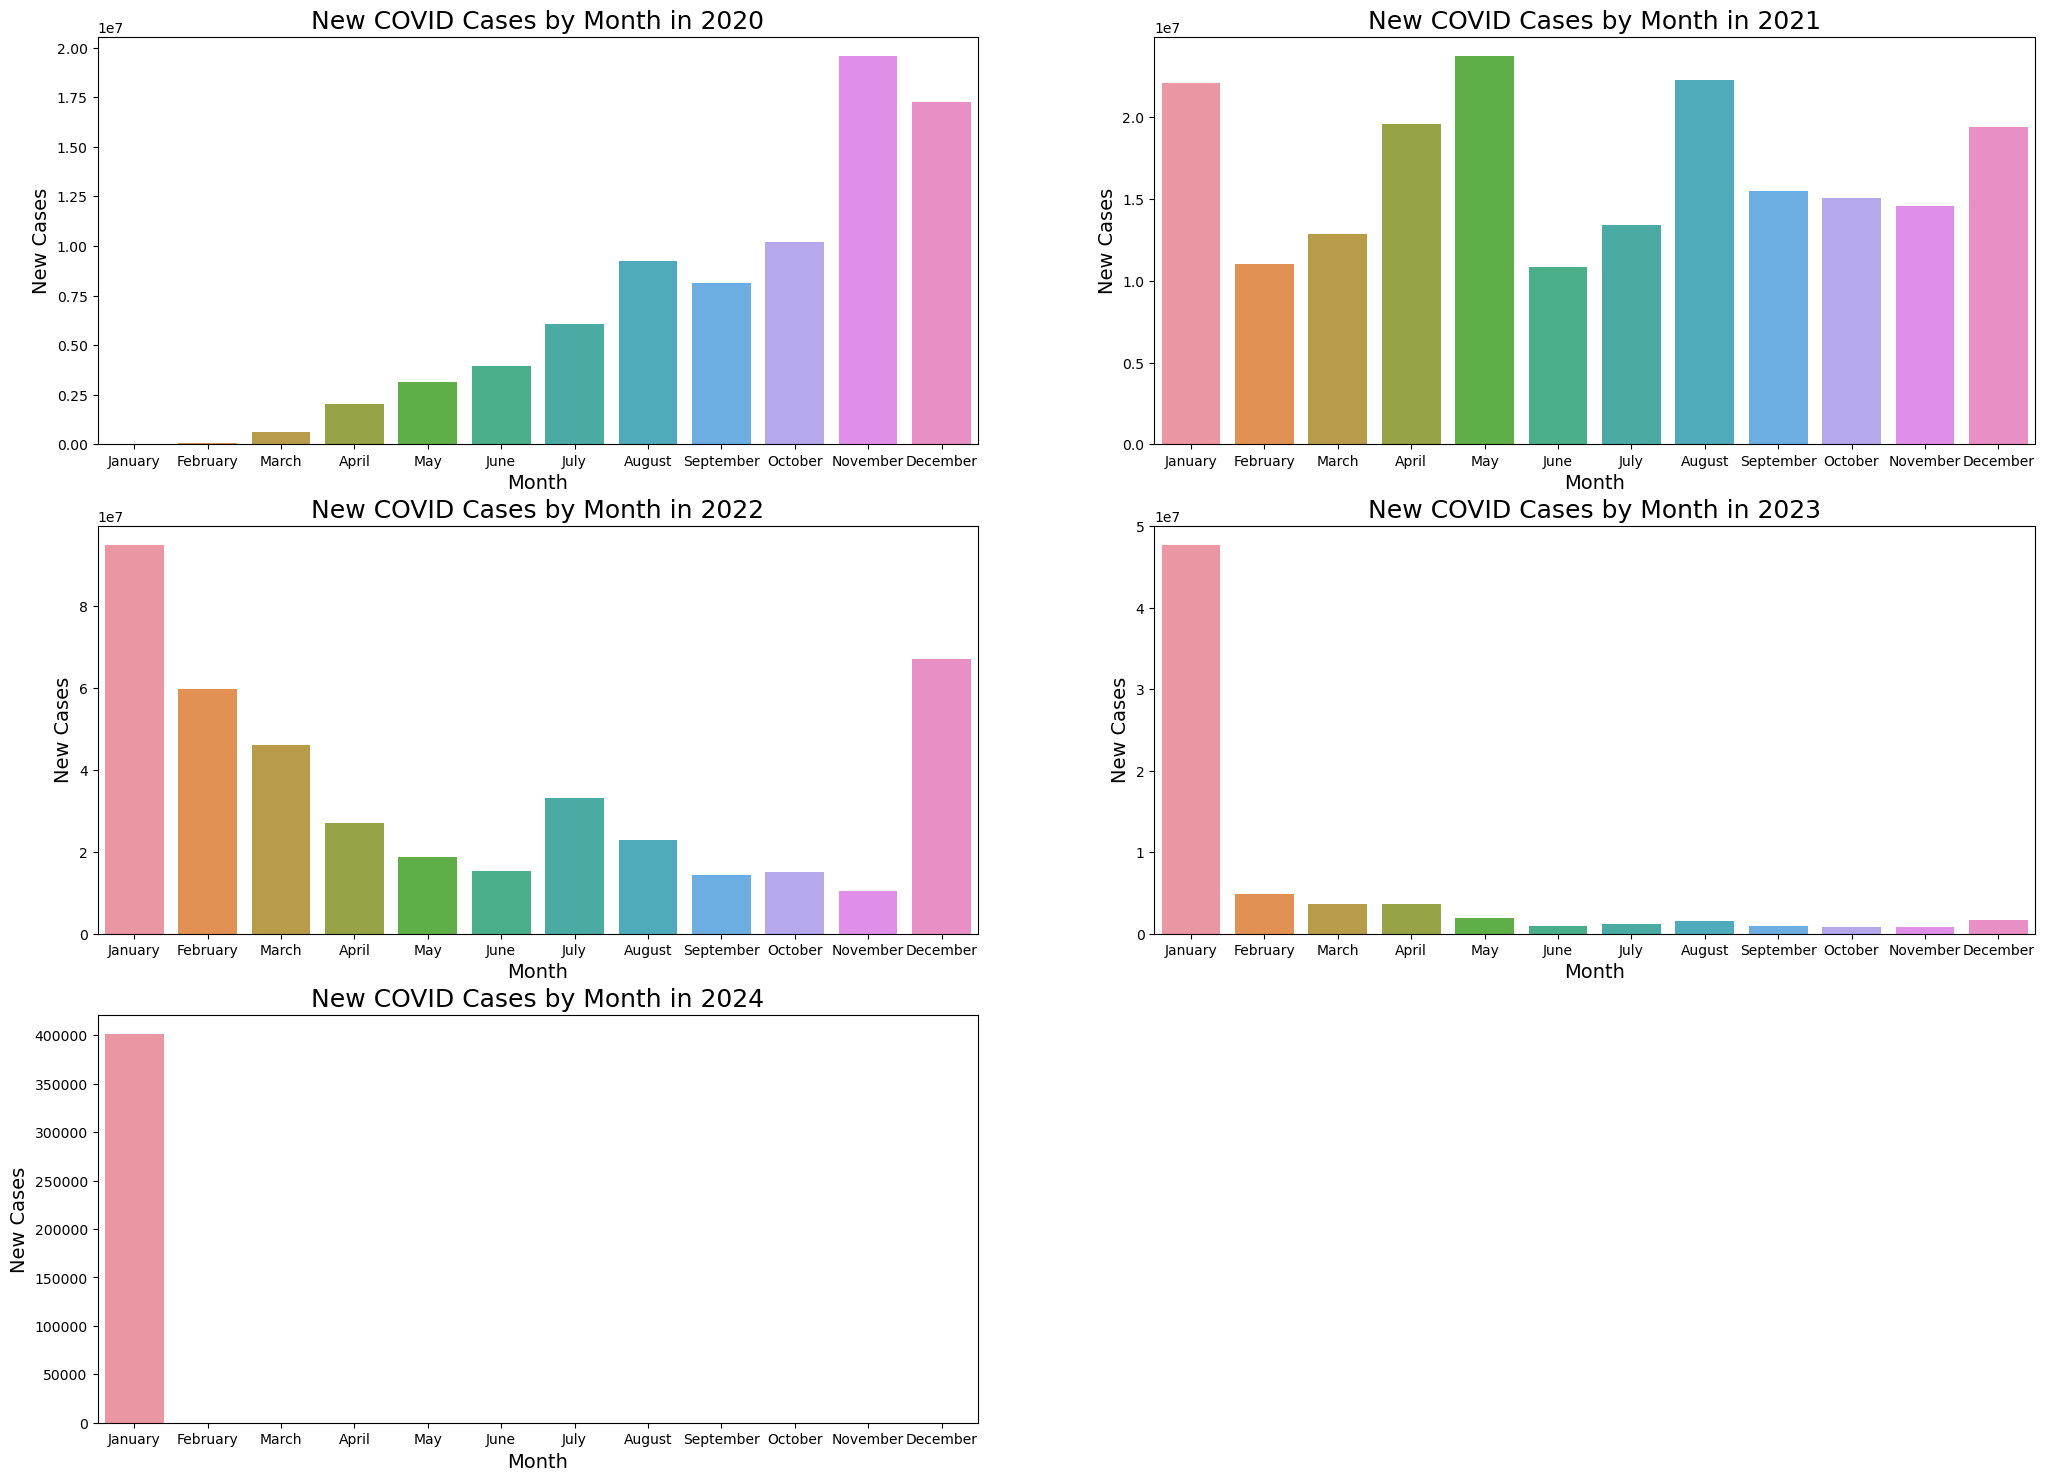

In [18]:
plt.figure(figsize=(25,18))

plt.subplot(3,2,1)
months_df= covid_raw_df[covid_raw_df.Year==2020].groupby('Month')[['New_cases']].sum()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_df=months_df.reindex(month_order)
# Plot using seaborn's barplot
sns.barplot(x=months_df.index, y='New_cases', data=months_df)
plt.xlabel('Month',size=14)
plt.ylabel('New Cases',size=14)
plt.title('New COVID Cases by Month in 2020',size=18)

plt.subplot(3,2,2)
months_df = covid_raw_df[covid_raw_df.Year==2021].groupby('Month')[['New_cases']].sum()
months_df=months_df.reindex(month_order)
# Plot using seaborn's barplot
sns.barplot(x=months_df.index, y='New_cases', data=months_df)
plt.xlabel('Month',size=14)
plt.ylabel('New Cases',size=14)
plt.title('New COVID Cases by Month in 2021',size=18)

plt.subplot(3,2,3)
months_df = covid_raw_df[covid_raw_df.Year==2022].groupby('Month')[['New_cases']].sum()
months_df=months_df.reindex(month_order)
# Plot using seaborn's barplot
sns.barplot(x=months_df.index, y='New_cases', data=months_df)
plt.xlabel('Month',size=14)
plt.ylabel('New Cases',size=14)
plt.title('New COVID Cases by Month in 2022',size=18)

plt.subplot(3,2,4)
months_df = covid_raw_df[covid_raw_df.Year==2023].groupby('Month')[['New_cases']].sum()
months_df=months_df.reindex(month_order)
# Plot using seaborn's barplot
sns.barplot(x=months_df.index, y='New_cases', data=months_df)
plt.xlabel('Month',size=14)
plt.ylabel('New Cases',size=14)
plt.title('New COVID Cases by Month in 2023',size=18)

plt.subplot(3,2,5)
months_df = covid_raw_df[covid_raw_df.Year==2024].groupby('Month')[['New_cases']].sum()
months_df=months_df.reindex(month_order)
# Plot using seaborn's barplot
sns.barplot(x=months_df.index, y='New_cases', data=months_df)
plt.xlabel('Month',size=14)
plt.ylabel('New Cases',size=14)
plt.title('New COVID Cases by Month in 2024',size=18)
plt.savefig('newcases.png')

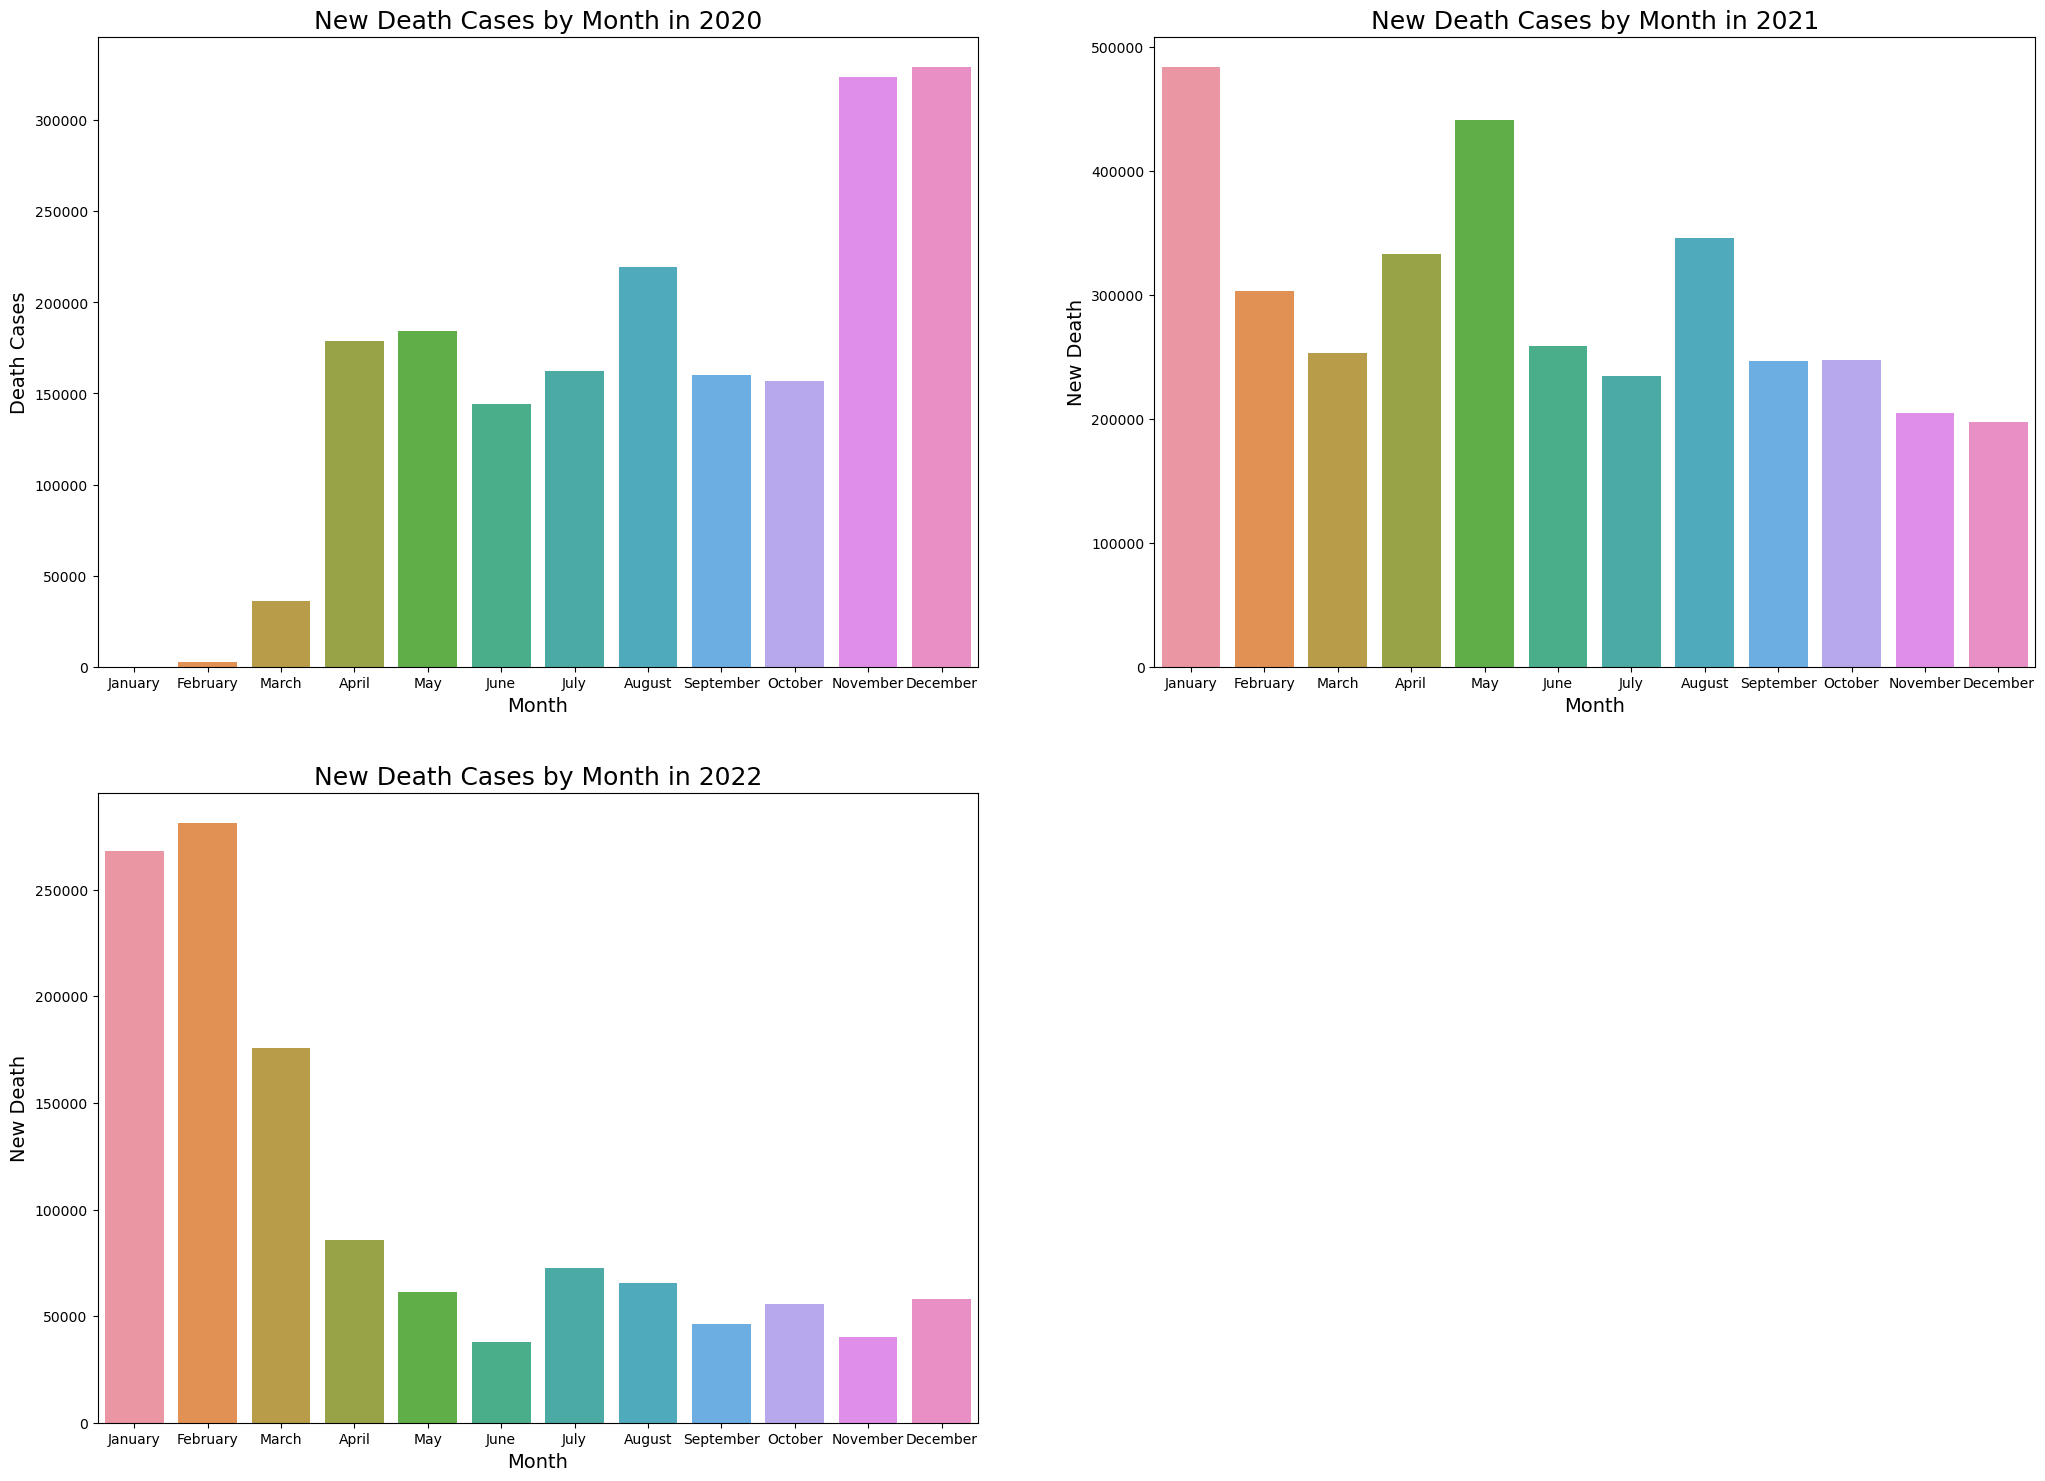

In [19]:
plt.figure(figsize=(25,18))

plt.subplot(2,2,1)
months_df= covid_raw_df[covid_raw_df.Year==2020].groupby('Month')[['New_deaths']].sum()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_df=months_df.reindex(month_order)
# Plot using seaborn's barplot
sns.barplot(x=months_df.index, y='New_deaths', data=months_df)
plt.xlabel('Month',size=14)
plt.ylabel('Death Cases',size=14)
plt.title('New Death Cases by Month in 2020',size=18)

plt.subplot(2,2,2)
months_df = covid_raw_df[covid_raw_df.Year==2021].groupby('Month')[['New_deaths']].sum()
months_df=months_df.reindex(month_order)
# Plot using seaborn's barplot
sns.barplot(x=months_df.index, y='New_deaths', data=months_df)
plt.xlabel('Month',size=14)
plt.ylabel('New Death',size=14)
plt.title('New Death Cases by Month in 2021',size=18)

plt.subplot(2,2,3)
months_df = covid_raw_df[covid_raw_df.Year==2022].groupby('Month')[['New_deaths']].sum()
months_df=months_df.reindex(month_order)
# Plot using seaborn's barplot
sns.barplot(x=months_df.index, y='New_deaths', data=months_df)
plt.xlabel('Month',size=14)
plt.ylabel('New Death',size=14)
plt.title('New Death Cases by Month in 2022',size=18)

plt.savefig('deaths.png')

In [20]:
new_cases_by_year = covid_raw_df.groupby('Year')['New_cases'].sum()
new_cases_by_year 

Year
2020    80,316,790.00
2021   200,297,624.00
2022   424,017,189.00
2023    69,336,209.00
2024       400,749.00
Name: New_cases, dtype: float64

In [21]:
covid_raw_df['Year'].unique()

array([2020, 2021, 2022, 2023, 2024])

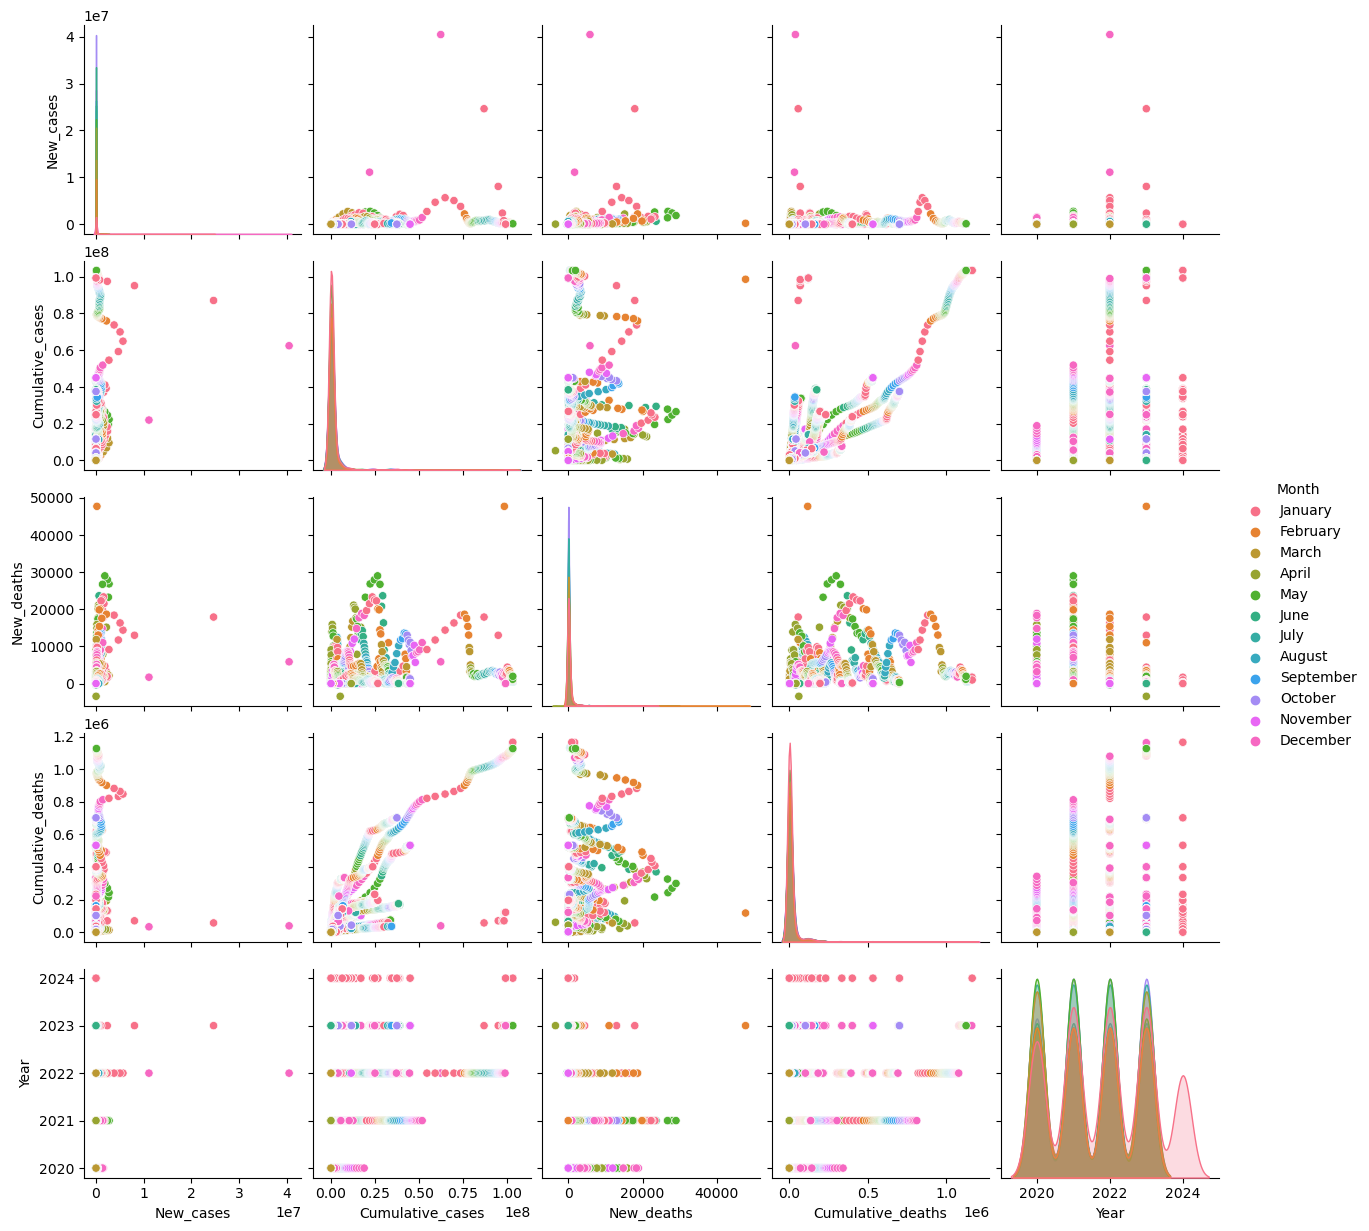

In [22]:
sns.pairplot(covid_raw_df,hue='Month')
plt.show()

In [23]:
#covid_raw_df.to_excel('Covid_data.xlsx',index=False)

## 2. For Vaccination data 

In [24]:
vacc_raw_df

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Bhutan,BTN,SEARO,REPORTING,2022-10-30,"2,011,426.00","699,116.00",261.00,91.00,"677,669.00",88.00,NaN,2021-03-27,NaN,"634,641.00",82.00
1,Namibia,NAM,AFRO,REPORTING,2023-11-12,"1,005,937.00","629,767.00",40.00,25.00,"550,978.00",22.00,NaN,2021-03-19,NaN,"298,560.00",12.00
2,Iran (Islamic Republic of),IRN,EMRO,REPORTING,2023-11-26,"155,461,757.00","65,199,831.00",185.00,78.00,"58,585,264.00",70.00,NaN,2021-02-09,NaN,"31,352,288.00",37.00
3,Kenya,KEN,AFRO,REPORTING,2023-04-02,"23,750,431.00","14,494,372.00",44.00,27.00,"11,090,440.00",21.00,NaN,2021-03-05,NaN,"2,000,636.00",4.00
4,Greenland,GRL,EURO,REPORTING,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Guinea-Bissau,GNB,AFRO,REPORTING,2023-10-15,"920,752.00","747,057.00",47.00,38.00,"547,637.00",28.00,NaN,2021-04-02,NaN,"76,359.00",4.00
206,Liechtenstein,LIE,NaN,REPORTING,NaT,"71,104.00","26,681.00",NaN,NaN,"26,346.00",NaN,NaN,NaT,NaN,"18,310.00",NaN
207,Côte d'Ivoire,CIV,AFRO,REPORTING,2023-02-19,"25,263,932.00","13,568,372.00",96.00,51.00,"12,164,304.00",46.00,NaN,2021-03-01,NaN,"3,138,712.00",12.00
208,Equatorial Guinea,GNQ,AFRO,REPORTING,2022-07-24,"488,738.00","270,109.00",35.00,19.00,"214,032.00",15.00,NaN,2021-02-12,NaN,"4,597.00",NaN


In [25]:
# Meta-info about vaccination data
vacc_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   COUNTRY                               210 non-null    object        
 1   ISO3                                  210 non-null    object        
 2   WHO_REGION                            206 non-null    object        
 3   DATA_SOURCE                           210 non-null    object        
 4   DATE_UPDATED                          203 non-null    datetime64[ns]
 5   TOTAL_VACCINATIONS                    204 non-null    float64       
 6   PERSONS_VACCINATED_1PLUS_DOSE         204 non-null    float64       
 7   TOTAL_VACCINATIONS_PER100             202 non-null    float64       
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  202 non-null    float64       
 9   PERSONS_LAST_DOSE                     204 non-null    float64       
 10  PE

In [26]:
# Summary/Overview
vacc_raw_df.describe(include='all')

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
count,210,210,206,210,203,204.00,204.00,202.00,202.00,204.00,202.00,0.00,196,0.00,190.00,179.00
unique,210,210,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Bhutan,BTN,EURO,REPORTING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,55,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2023-06-21 14:11:13.891625728,"66,671,007.66","27,463,315.59",152.76,62.80,"25,313,423.67",57.87,NaN,2021-02-17 09:25:42.857142784,NaN,"13,124,320.41",32.68
min,NaN,NaN,NaN,NaN,2022-01-29 00:00:00,"4,619.00","1,638.00",4.00,4.00,"1,635.00",3.00,NaN,2020-07-22 00:00:00,NaN,314.00,1.00
25%,NaN,NaN,NaN,NaN,2023-04-19 00:00:00,"963,836.75","515,434.50",81.25,45.25,"446,261.50",39.25,NaN,2021-01-11 00:00:00,NaN,"80,506.50",9.50
50%,NaN,NaN,NaN,NaN,2023-07-17 00:00:00,"7,751,393.50","3,954,866.00",154.00,67.00,"3,591,682.00",63.00,NaN,2021-02-17 12:00:00,NaN,"867,624.50",31.00
75%,NaN,NaN,NaN,NaN,2023-10-01 00:00:00,"27,422,275.25","14,021,732.50",220.00,83.00,"12,225,509.50",77.75,NaN,2021-03-15 06:00:00,NaN,"5,374,503.75",54.50
max,NaN,NaN,NaN,NaN,2023-11-26 00:00:00,"3,516,880,717.00","1,318,026,807.00",470.00,100.00,"1,284,479,582.00",100.00,NaN,2021-10-18 00:00:00,NaN,"834,060,133.00",83.00


In [27]:
vacc_raw_df.sample(10)

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
44,Antigua and Barbuda,ATG,AMRO,REPORTING,2023-06-02,"136,512.00","64,290.00",139.00,66.00,"62,384.00",64.00,NaN,2021-03-01,NaN,"9,838.00",10.00
103,Jordan,JOR,EMRO,REPORTING,2022-08-21,"10,057,975.00","4,821,579.00",99.00,47.00,"4,558,313.00",45.00,NaN,2021-01-13,NaN,"682,211.00",7.00
209,Egypt,EGY,EMRO,REPORTING,2023-05-21,"112,673,535.00","56,907,319.00",110.00,56.00,"42,337,175.00",41.00,NaN,2021-01-24,NaN,"15,217,352.00",15.00
180,Gibraltar,GIB,NaN,REPORTING,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
94,Papua New Guinea,PNG,WPRO,REPORTING,2023-11-05,"540,974.00","396,922.00",6.00,4.00,"335,728.00",4.00,NaN,2021-03-30,NaN,"37,105.00",NaN
12,Bahamas,BHS,AMRO,REPORTING,2023-06-02,"366,359.00","174,810.00",93.00,44.00,"166,972.00",42.00,NaN,2021-03-14,NaN,"33,717.00",9.00
183,France,FRA,EURO,REPORTING,2023-07-09,"158,060,078.00","54,677,676.00",243.00,84.00,"53,189,148.00",82.00,NaN,2020-12-23,NaN,"41,042,160.00",63.00
194,Republic of Moldova,MDA,EURO,REPORTING,2023-10-01,"2,291,436.00","1,109,270.00",57.00,27.00,"1,078,813.00",27.00,NaN,2021-03-03,NaN,"404,774.00",10.00
56,Iceland,ISL,EURO,REPORTING,2023-04-16,"869,976.00","307,269.00",239.00,84.00,"297,921.00",82.00,NaN,2020-12-30,NaN,"254,556.00",70.00
122,Israel,ISR,EURO,REPORTING,2022-06-05,"17,915,305.00","7,055,466.00",207.00,82.00,"6,385,731.00",74.00,NaN,2020-12-16,NaN,"4,474,108.00",52.00


# Pioneers and Late Adopters in COVID-19 Vaccination

In [28]:
# The index of the first occurrence of the minimum value in 'FIRST_VACCINE_DATE'
first_country_index = vacc_raw_df['FIRST_VACCINE_DATE'].idxmin()

# The index of the last occurrence of the maximum value in 'FIRST_VACCINE_DATE'
last_country_index = vacc_raw_df['FIRST_VACCINE_DATE'].idxmax()

# Get the country names corresponding to the first and last indices
first_country = vacc_raw_df.loc[first_country_index, ['COUNTRY','FIRST_VACCINE_DATE']]
last_country = vacc_raw_df.loc[last_country_index, ['COUNTRY','FIRST_VACCINE_DATE']]

# Print the results
print(f"{first_country[0]} is the first country to use the vaccine on {first_country[1]}")
print(f"{last_country[0]} is the last country to use the vaccine on {last_country[1]}")

China is the first country to use the vaccine on 2020-07-22 00:00:00
Burundi is the last country to use the vaccine on 2021-10-18 00:00:00


# Tracking Total Vaccinations: A Country and WHO Region Breakdown

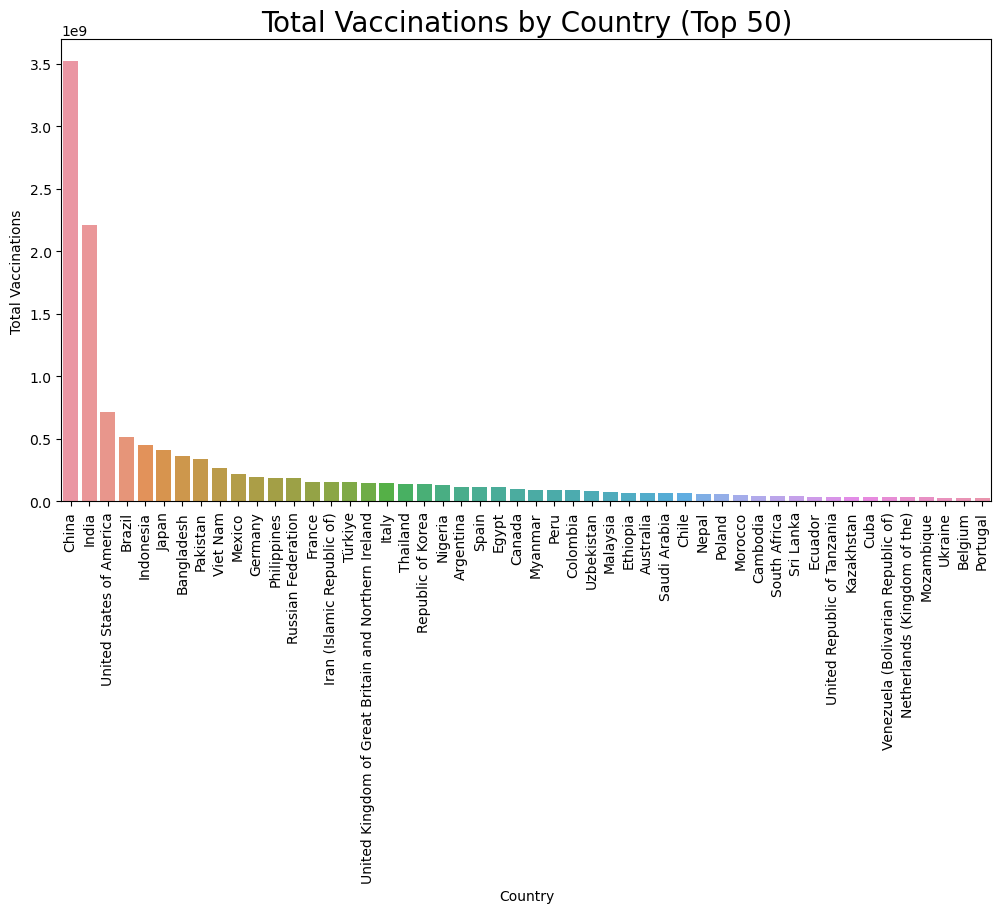

In [29]:
# Bar Chart of Total Vaccinations by Country

# Sort the data by total vaccinations in descending order and select the top 50 countries
top_50_countries = vacc_raw_df.sort_values(by='TOTAL_VACCINATIONS', ascending=False).head(50)

# Create the bar chart for the top 50 countries
plt.figure(figsize=(12, 6))
sns.barplot(x='COUNTRY', y='TOTAL_VACCINATIONS', data=top_50_countries)
plt.xticks(rotation=90)
plt.title('Total Vaccinations by Country (Top 50)',size=20)
plt.xlabel('Country')
plt.ylabel('Total Vaccinations')
plt.show()

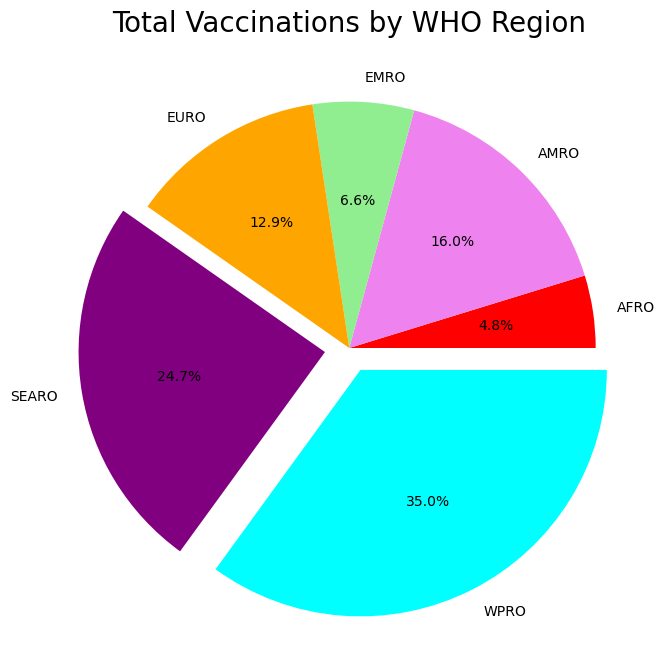

In [30]:
# Pie Chart of Total Vaccinations by WHO Region
plt.figure(figsize=(8, 8))
vacc_raw_df.groupby('WHO_REGION')['TOTAL_VACCINATIONS'].sum().plot(kind='pie', autopct='%1.1f%%',explode=(0,0,0,0,0.1,0.1),colors = ['red', 'violet', 'lightgreen', 'orange', 'purple', 'cyan'])
plt.title('Total Vaccinations by WHO Region',size=20)
plt.ylabel('')
plt.show()

# Temporal Analysis of Global Vaccination Efforts

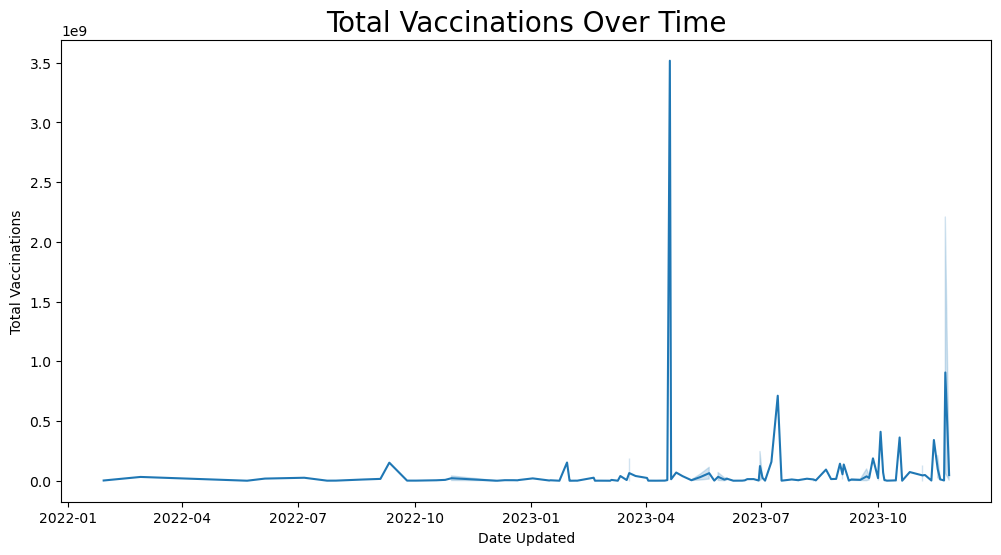

In [31]:
# Line Plot of Total Vaccinations Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE_UPDATED', y='TOTAL_VACCINATIONS', data=vacc_raw_df)
plt.title('Total Vaccinations Over Time',size=20)
plt.xlabel('Date Updated')
plt.ylabel('Total Vaccinations')
plt.show()

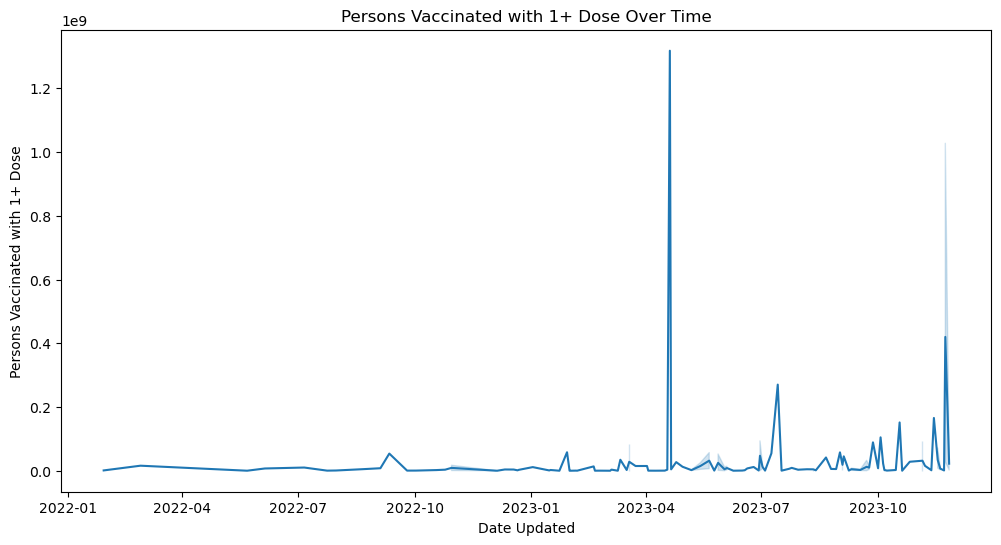

In [32]:
# Line Plot of Persons Vaccinated with 1+ Dose Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE_UPDATED', y='PERSONS_VACCINATED_1PLUS_DOSE', data=vacc_raw_df)
plt.title('Persons Vaccinated with 1+ Dose Over Time')
plt.xlabel('Date Updated')
plt.ylabel('Persons Vaccinated with 1+ Dose')
plt.show()

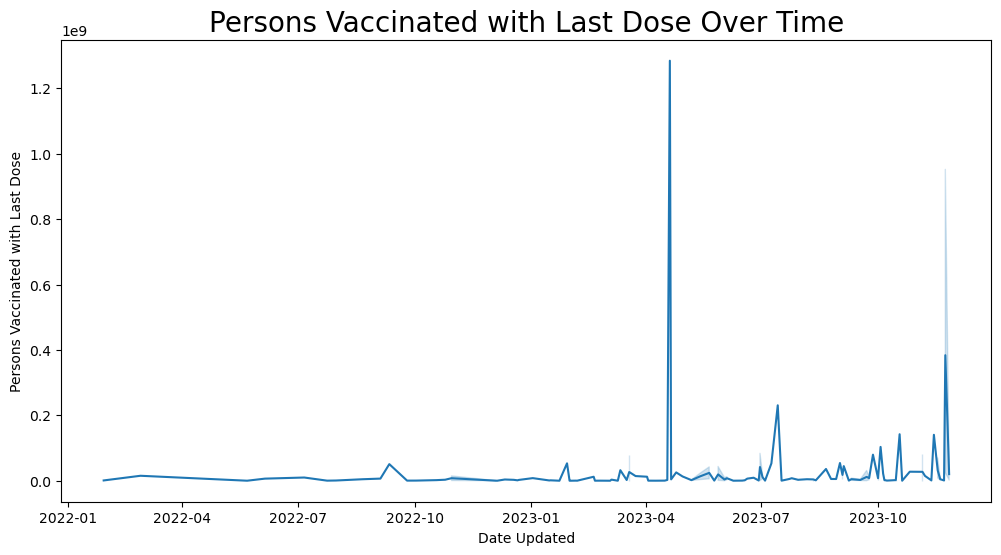

In [33]:
# Line Plot of Persons Vaccinated with Last Dose Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE_UPDATED', y='PERSONS_LAST_DOSE', data=vacc_raw_df)
plt.title('Persons Vaccinated with Last Dose Over Time',size=20)
plt.xlabel('Date Updated')
plt.ylabel('Persons Vaccinated with Last Dose')
plt.show()

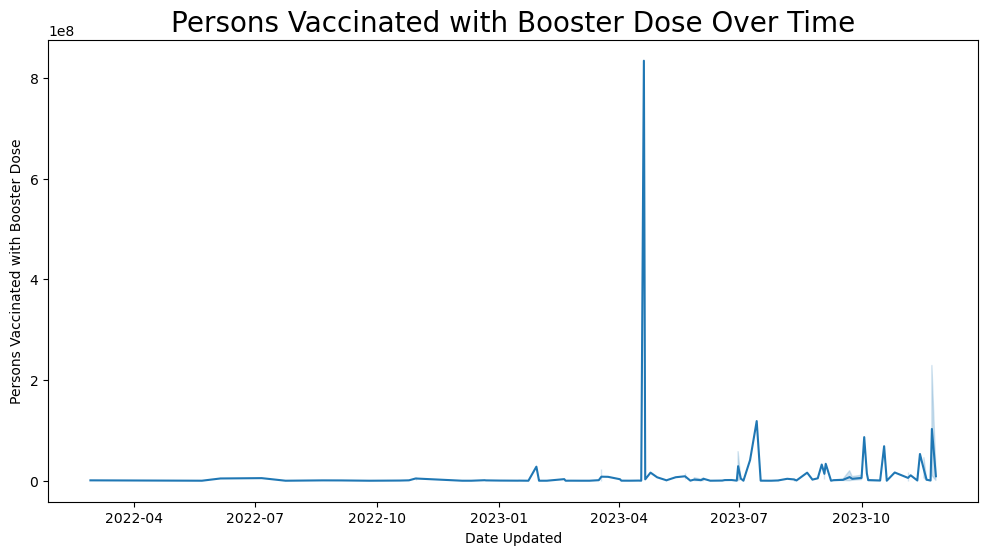

In [34]:
# Line Plot of Persons Vaccinated with Last Dose Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE_UPDATED', y='PERSONS_BOOSTER_ADD_DOSE', data=vacc_raw_df)
plt.title('Persons Vaccinated with Booster Dose Over Time',size=20)
plt.xlabel('Date Updated')
plt.ylabel('Persons Vaccinated with Booster Dose')
plt.show()

# Global Vaccination Overview: 1+ Dose, Last Dose, and Booster Dose for Top 50 Countries

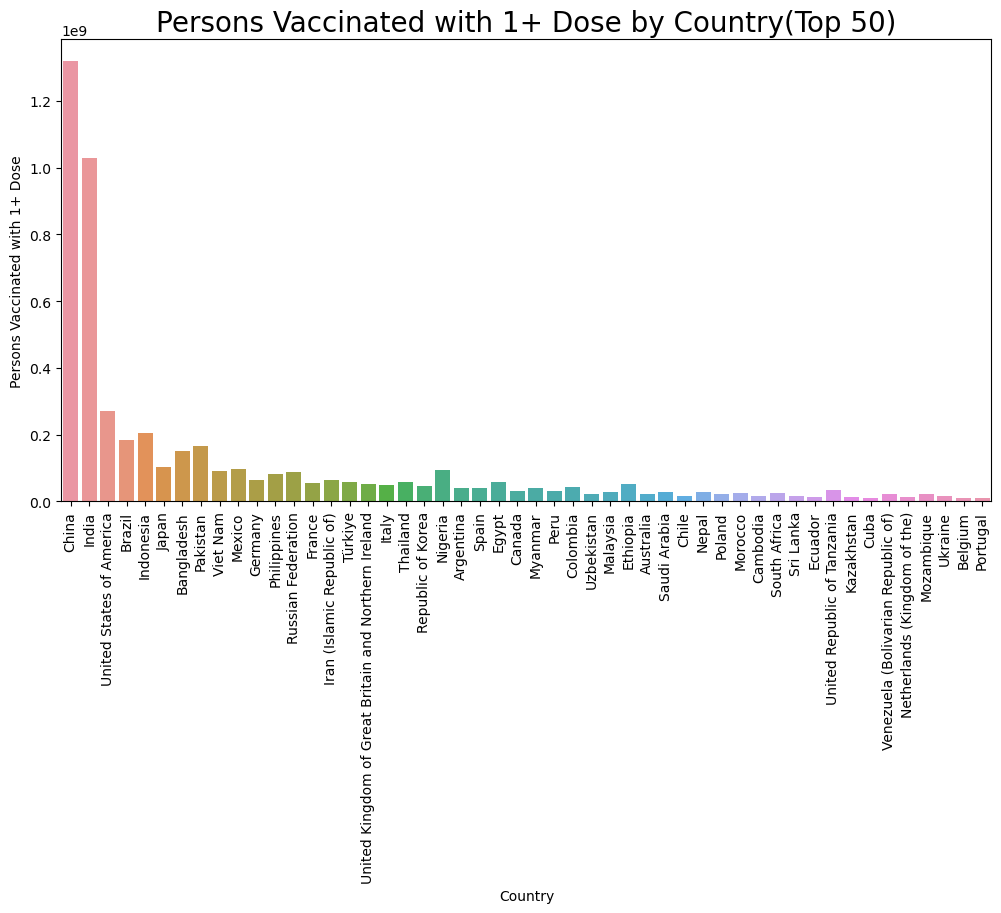

In [35]:
# Bar Chart of Persons Vaccinated with 1+ Dose by Country
plt.figure(figsize=(12, 6))
sns.barplot(x='COUNTRY', y='PERSONS_VACCINATED_1PLUS_DOSE', data=top_50_countries)
plt.xticks(rotation=90)
plt.title('Persons Vaccinated with 1+ Dose by Country(Top 50)',size=20)
plt.xlabel('Country')
plt.ylabel('Persons Vaccinated with 1+ Dose')
plt.show()

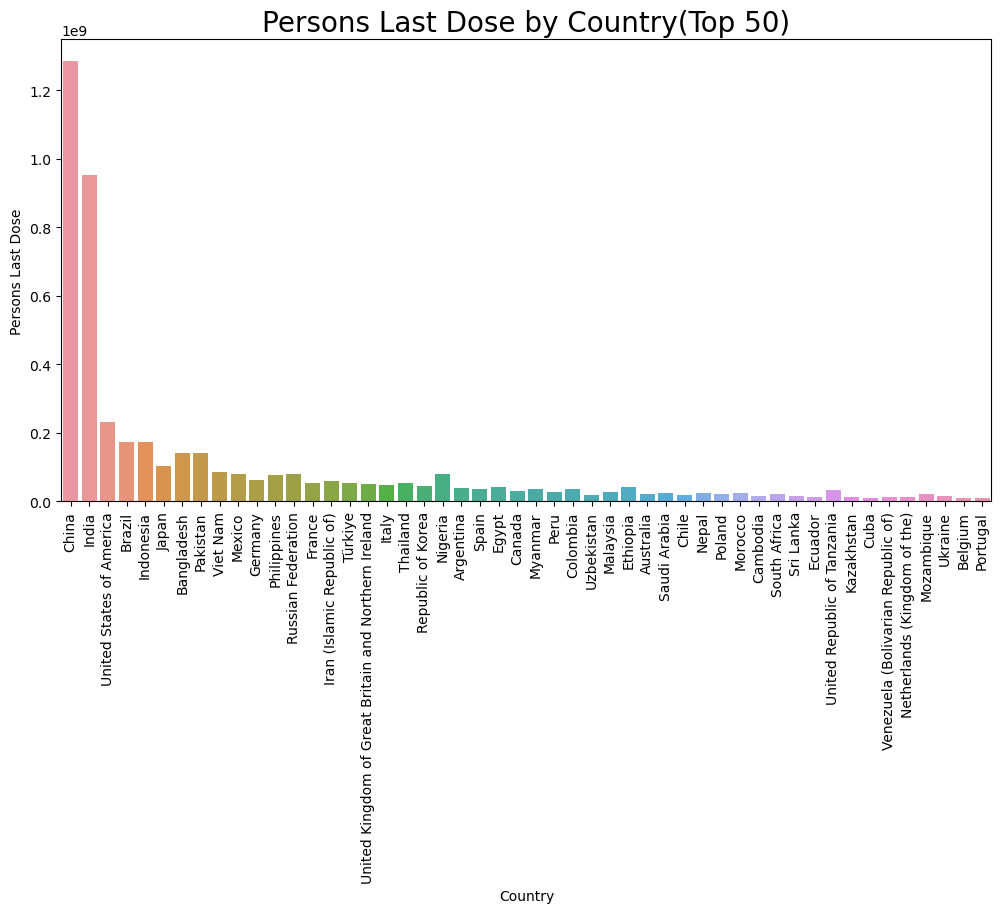

In [36]:
# Bar Chart of Persons Last Dose by Country
plt.figure(figsize=(12, 6))
sns.barplot(x='COUNTRY', y='PERSONS_LAST_DOSE', data=top_50_countries)
plt.xticks(rotation=90)
plt.title('Persons Last Dose by Country(Top 50)',size=20)
plt.xlabel('Country')
plt.ylabel('Persons Last Dose')
plt.show()

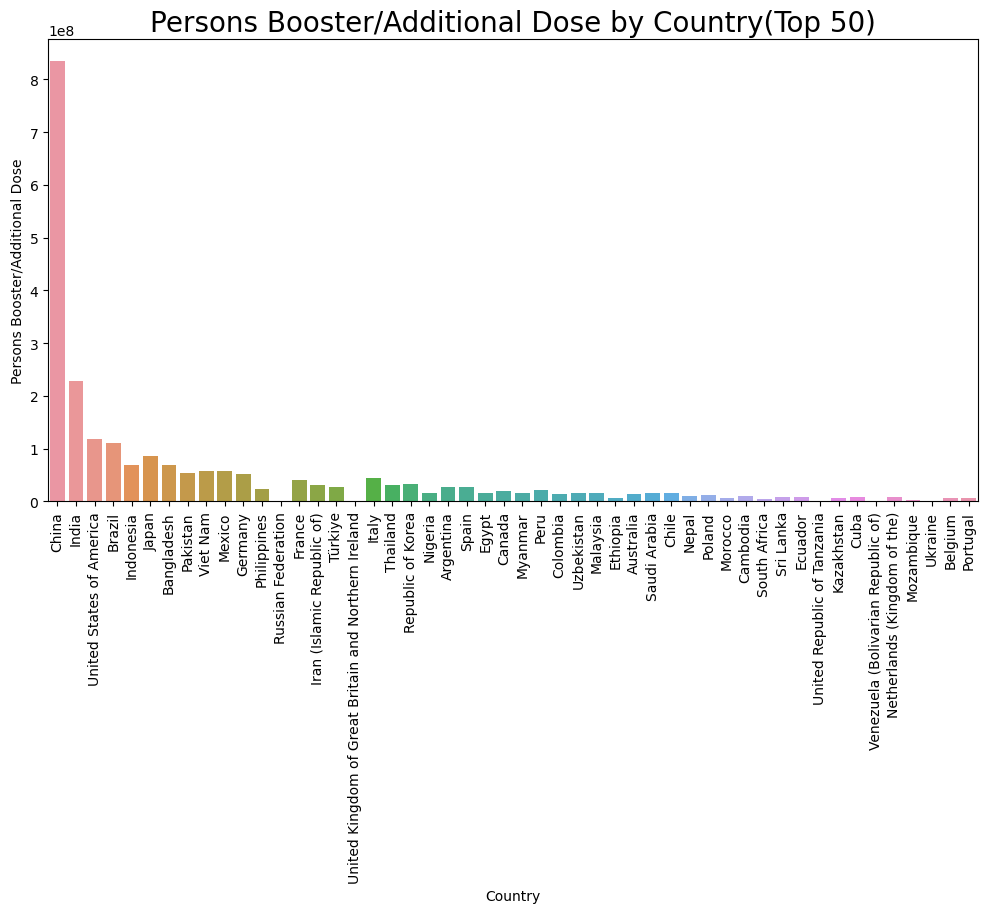

In [37]:
# Bar Chart of Persons Booster/Additional Dose by Country
plt.figure(figsize=(12, 6))
sns.barplot(x='COUNTRY', y='PERSONS_BOOSTER_ADD_DOSE', data=top_50_countries)
plt.xticks(rotation=90)
plt.title('Persons Booster/Additional Dose by Country(Top 50)',size=20)
plt.xlabel('Country')
plt.ylabel('Persons Booster/Additional Dose')
plt.show()

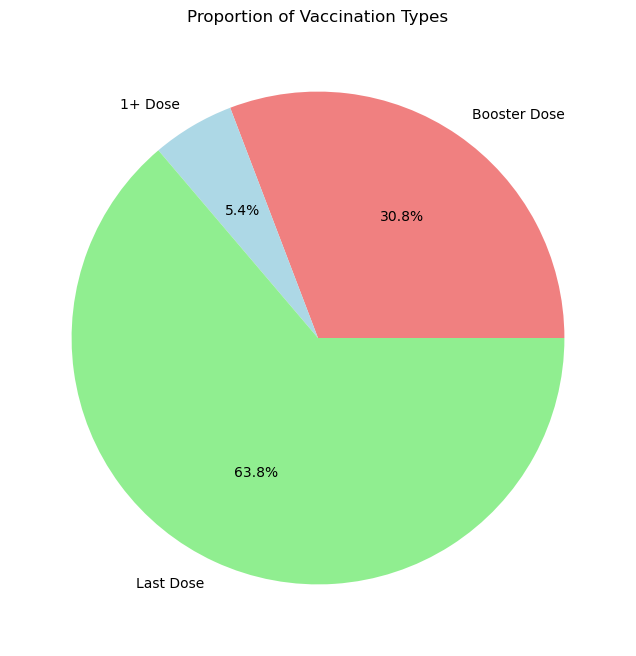

In [38]:
# Proportion of Vaccination Types
total_booster = vacc_raw_df['PERSONS_BOOSTER_ADD_DOSE'].sum()
total_last_dose = vacc_raw_df['PERSONS_LAST_DOSE'].sum()
total_1plus_dose = vacc_raw_df['PERSONS_VACCINATED_1PLUS_DOSE'].sum()

# Creating labels and data for the pie chart
labels = ['Booster Dose', '1+ Dose', 'Last Dose']
sizes = [total_booster, total_1plus_dose - total_last_dose, total_last_dose]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Proportion of Vaccination Types')
plt.show()

# Insights:
- **China, Japan, and Republic of Korea** are among the top 10 countries with the highest number of COVID-19 cases but do not appear in the top 10 countries with the most deaths. Conversely, **Mexico, Peru, and the Russian Federation** are in the top 10 for deaths but not for cases.

- **EURO** (23,411,056 cases) is the region with the highest number of COVID-19 cases, while **AMRO** (2,994,548 deaths) has the highest number of deaths.

- A noticeable spike in new cases and deaths occurred in 2021, followed by a sudden decline at the end of 2021 and into the start of 2022.

- **China** was the first country to administer the COVID-19 vaccine on **July 22, 2020**, while **Burundi** was the last to begin vaccinations on **October 18, 2021**.

- The top three countries with the most people vaccinated are **China**, **India**, and **the USA**.

- **WPRO** has the highest percentage of vaccinated individuals, with **35%** of the population vaccinated.

- Throughout most of the timeline, the total number of vaccinations remained relatively low, with only minor fluctuations. This suggests either steady progress in vaccinations or slow rollout rates during certain periods.

- A significant peak in early 2023 indicates a concentrated vaccination effort or mass reporting of vaccinations during that period, possibly due to policy changes, public health campaigns, or data corrections.

- Proportion of Vaccination Types:
    - Last Dose: 63.8%
    - Booster Dose: 30.8% 
    - 1+ Dose: 5.4%

# Conclusion:
- The global response to COVID-19 demonstrates diverse trends in both the pandemic’s impact and the vaccination rollout. The distribution of cases and deaths reveals interesting disparities: countries like **China**, **Japan**, and **the Republic of Korea** have high case numbers but relatively fewer deaths, whereas **Mexico** and **Peru** exhibit high death tolls with fewer reported cases. These variations may stem from differences in healthcare systems, reporting practices, and public health strategies.

- In terms of vaccination efforts, **China**, **India**, and **the USA** lead in the total number of vaccinated individuals, while the **WPRO** region stands out with the highest percentage of vaccinated people. Despite slow early progress, a noticeable surge in vaccination rates in early 2023 signals a more coordinated global effort, likely driven by improved vaccine availability, policy changes, and mass vaccination drives.

- These insights highlight the complexity of the global pandemic response. Challenges in vaccine distribution, healthcare infrastructure, and public health policy have influenced the outcomes. While some countries and regions have made significant strides in vaccinating their populations, others have faced more obstacles. As the pandemic continues, tailored approaches are crucial for addressing these disparities, improving vaccination coverage, and managing both the health impacts and vaccination efforts effectively.